In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf

ModuleNotFoundError: No module named 'seaborn'

(5761, 9)


<Axes: >

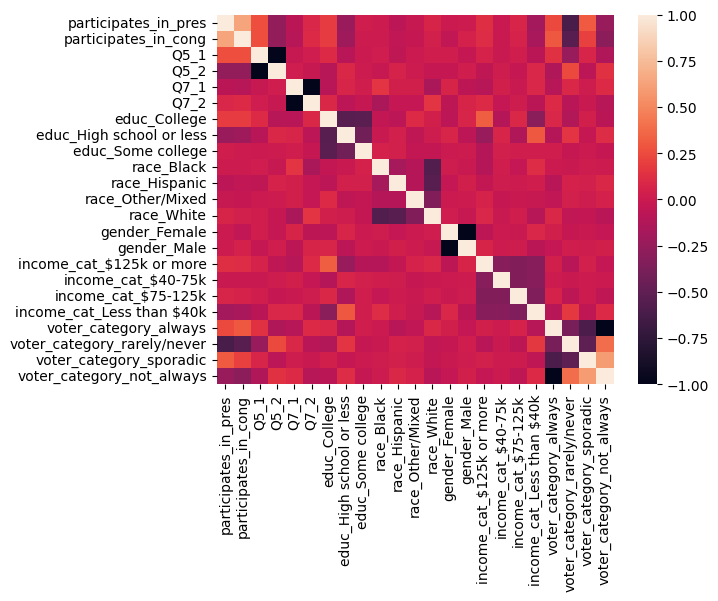

In [ ]:
# Load data
df = pd.read_csv("nonvoters_data.csv")
df_copy = df.copy()
voter_order = ['rarely/never', 'sporadic', 'always']
df_target['voter_category'] = df['voter_category'].map({v: i for i, v in enumerate(voter_order)})

# Q1 - No varied response
# Q19_1: Q19_10 - Missing information
# Q21, Q22 - Reveals plan to vote (leakage)
# Q26, Q27_1: Q27_6, Q28_1: Q28_8, Q29_1: Q29_10 - Reveals voter category (leakage)
redundant_columns = ["RespId", "weight",
                     "Q1", "Q19_1", "Q19_2", "Q19_3", "Q19_4", "Q19_5", "Q19_6", "Q19_7", "Q19_8", "Q19_9", "Q19_10",
                     "Q21", "Q22", "Q26", "Q27_1", "Q27_2", "Q27_3", "Q27_4", "Q27_5", "Q27_6",
                     "Q28_1", "Q28_2", "Q28_3", "Q28_4", "Q28_5", "Q28_6", "Q28_7", "Q28_8",
                     "Q29_1", "Q29_2", "Q29_3", "Q29_4", "Q29_5", "Q29_6", "Q29_7", "Q29_8", "Q29_9", "Q29_10"]

# Clean data
# df = df.drop(columns=redundant_columns)
df = df[(df['Q5'] != -1)]
df = df[(df['Q7'] != -1)]
df['participates_in_pres'] = (df['Q27_2'] == 1) | (df['Q27_4'] == 1) | (df['Q27_6'] == 1)
df['participates_in_cong'] = (df['Q27_1'] == 1) | (df['Q27_3'] == 1) | (df['Q27_5'] == 1)
columns = ['Q5', 'Q7', 'educ', 'race', 'gender', 'income_cat', 'voter_category', 'participates_in_pres', 'participates_in_cong']
df = df[columns]
df.reset_index(drop=True, inplace=True)
print(df.shape)


df = pd.get_dummies(df, columns=['Q5', 'Q7', 'educ', 'race', 'gender', 'income_cat', 'voter_category'])
df['voter_category_not_always'] = (df['voter_category_rarely/never'] == True) | (df['voter_category_sporadic'] == True)
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
sns.heatmap(df.corr())

In [ ]:
# Labeling relevant columns
civic_attitudes = ["Q2_1", "Q4_1", "Q4_2", "Q4_3", "Q4_4", "Q4_5", "Q4_6", "Q5", "Q9_1", "Q9_2", "Q9_3", "Q9_4"]
trust_institutions = ["Q8_1", "Q8_2", "Q8_3", "Q8_4", "Q8_5", "Q8_6", "Q8_7", "Q8_8", "Q8_9"]
perceptions = ["Q3_1", "Q3_2", "Q3_3", "Q3_4", "Q3_5", "Q3_6"]
trust_voting = ["Q17_1", "Q17_2", "Q17_3", "Q17_4"]
voting_barriers = ["Q18_1", "Q18_2", "Q18_3", "Q18_4", "Q18_5", "Q18_6", "Q18_7", "Q18_8", "Q18_9", "Q18_10"]
voting_accessibility = ["Q16", "Q19_1", "Q19_2", "Q19_3", "Q19_4", "Q19_5", "Q19_6", "Q19_7", "Q19_8", "Q19_9", "Q19_10"]
plan_to_vote = ["Q21"]
voting_motivations = ["Q28_1", "Q28_2", "Q28_3", "Q28_4", "Q28_5", "Q28_6", "Q28_7", "Q28_8"]
party_affiliation = ["Q14", "Q15", "Q30", "Q31", "Q32", "Q33"]
demographics = ["ppage", "educ", "race", "gender", "income_cat", "voter_category"]

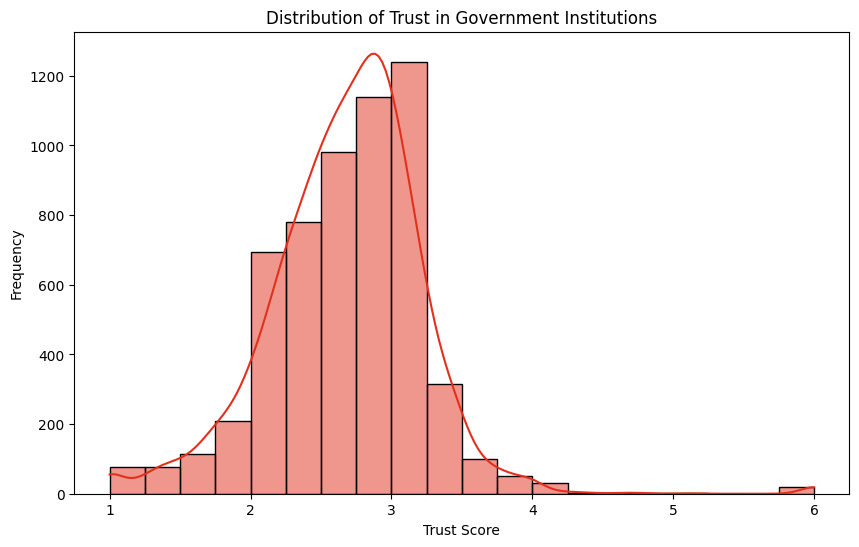

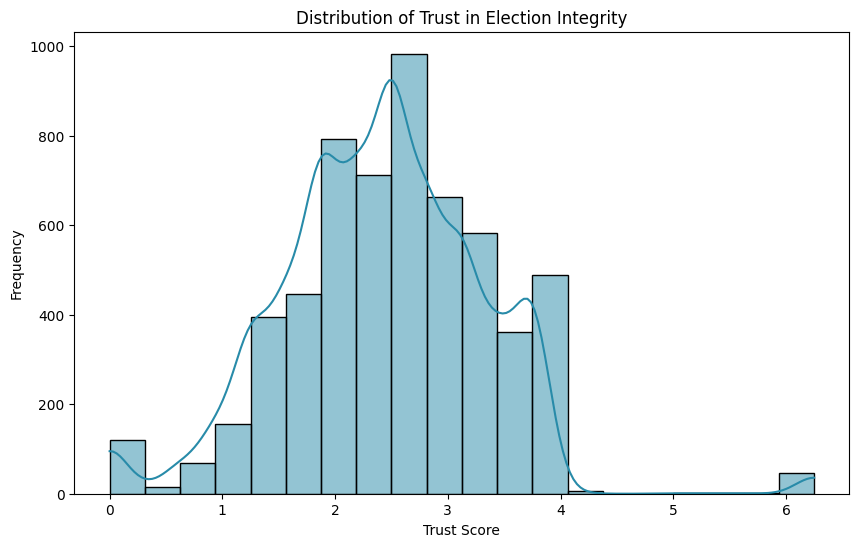

<ipython-input-298-bb684f9dabde>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='voter_category', y='government_trust', data=trust_by_voter_category, palette='flare')


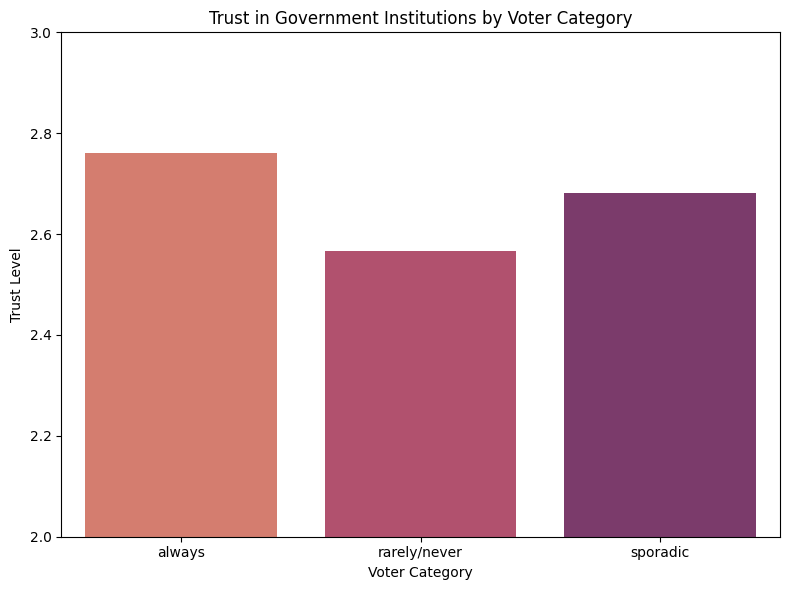

<ipython-input-298-bb684f9dabde>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='voter_category', y='election_trust', data=trust_by_voter_category, palette='crest')


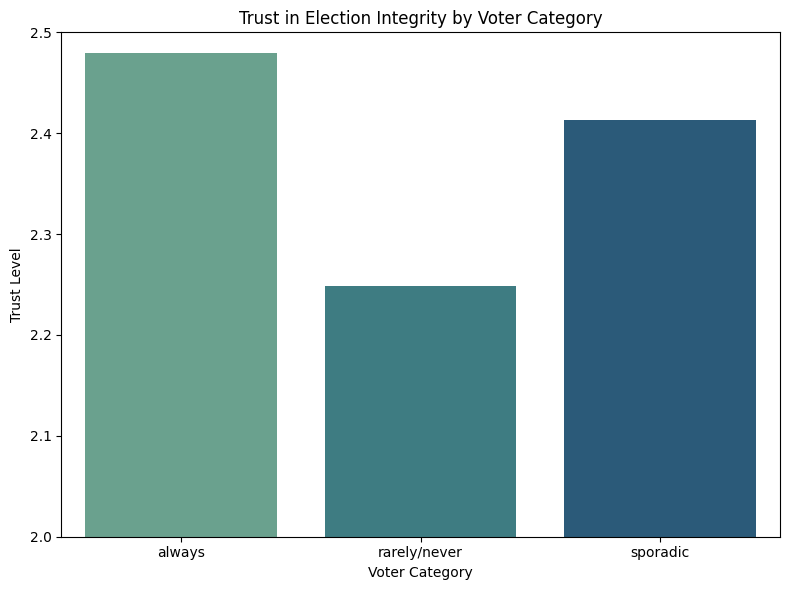

In [ ]:
# Trust in government institutions and election integrity
df_copy["government_trust"] = df_copy[trust_institutions].mean(axis=1)
df_copy["government_trust"] = 5 - df_copy["government_trust"]   # Invert scale (higher score = higher trust)

df_copy["election_trust"] = df_copy[trust_voting].mean(axis=1)
df_copy["election_trust"] = (4 - df_copy["election_trust"]) * 1.25   # For consistency (5 is highest score)

# Distribution of Trust in Government Institutions
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['government_trust'], kde=True, bins=20, color="#e3301d")
plt.title("Distribution of Trust in Government Institutions")
plt.xlabel("Trust Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of Trust in Election Integrity
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['election_trust'], kde=True, bins=20, color="#288ba9")
plt.title("Distribution of Trust in Election Integrity")
plt.xlabel("Trust Score")
plt.ylabel("Frequency")
plt.show()

# Plot Trust in Government Institutions by Voter Category
trust_by_voter_category = df_copy.groupby('voter_category')['government_trust'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='voter_category', y='government_trust', data=trust_by_voter_category, palette='flare')
plt.ylim(bottom=2.0, top = 3.0)
plt.title('Trust in Government Institutions by Voter Category')
plt.ylim(bottom=2.0, top = 3.0)
plt.xlabel('Voter Category')
plt.ylabel('Trust Level')
plt.tight_layout()
plt.show()

# Plot Trust in Election Integrity by Voter Category
trust_by_voter_category = df_copy.groupby('voter_category')['election_trust'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='voter_category', y='election_trust', data=trust_by_voter_category, palette='crest')
plt.ylim(bottom=2.0, top = 2.5)
plt.title('Trust in Election Integrity by Voter Category')
plt.xlabel('Voter Category')
plt.ylabel('Trust Level')
plt.tight_layout()
plt.show()

<ipython-input-197-208dd31af7b6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Motivation', data=motivation_counts, palette='flare')


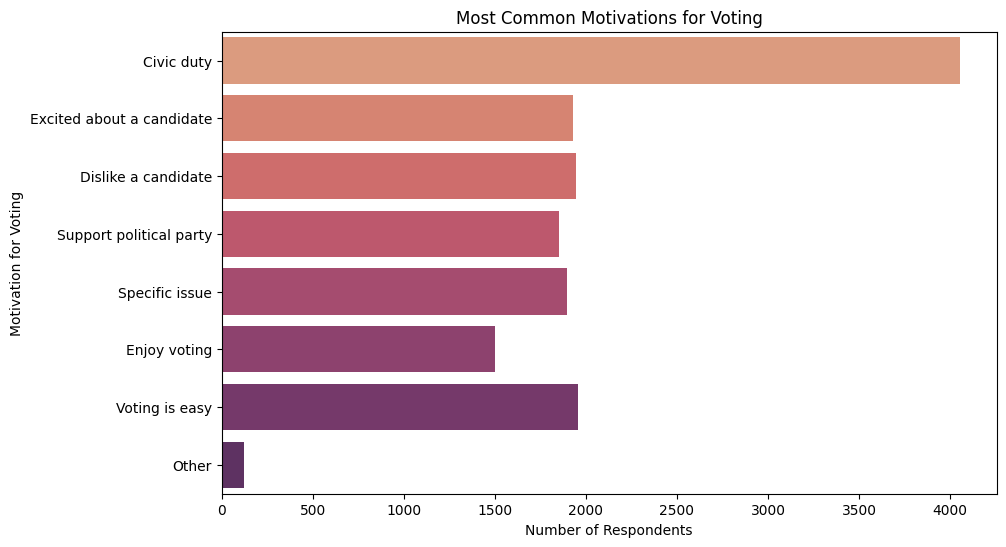

In [ ]:
# Motivations for voting
df_copy[voting_motivations] = df_copy[voting_motivations].replace(-1, 0)
df_copy.dropna(subset=voting_motivations, inplace=True)

# Distribution of Motivations for Voting
motivation_counts = df_copy[voting_motivations].sum().reset_index()
motivation_counts.columns = ['Motivation', 'Count']
motivation_labels = {
    "Q28_1": "Civic duty",
    "Q28_2": "Excited about a candidate",
    "Q28_3": "Dislike a candidate",
    "Q28_4": "Support political party",
    "Q28_5": "Specific issue",
    "Q28_6": "Enjoy voting",
    "Q28_7": "Voting is easy",
    "Q28_8": "Other"
}
motivation_counts['Motivation'] = motivation_counts['Motivation'].map(motivation_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Motivation', data=motivation_counts, palette='flare')
plt.title('Most Common Motivations for Voting')
plt.xlabel('Number of Respondents')
plt.ylabel('Motivation for Voting')
plt.show()

In [ ]:
# Plot Proportions Function
def plot_proportions(df, group_var, hue_var, title, xlabel, ylabel, legend_title, palette_name, order=None, hue_order=None):
    counts = df_copy.groupby([group_var, hue_var]).size().reset_index(name="count")
    totals = counts.groupby(group_var)["count"].transform("sum")
    counts["proportion"] = counts["count"] / totals
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_var, y="proportion", hue=hue_var, data=counts, palette=palette_name, order=order, hue_order=hue_order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=legend_title, loc="upper right")
    plt.tight_layout()
    plt.show()

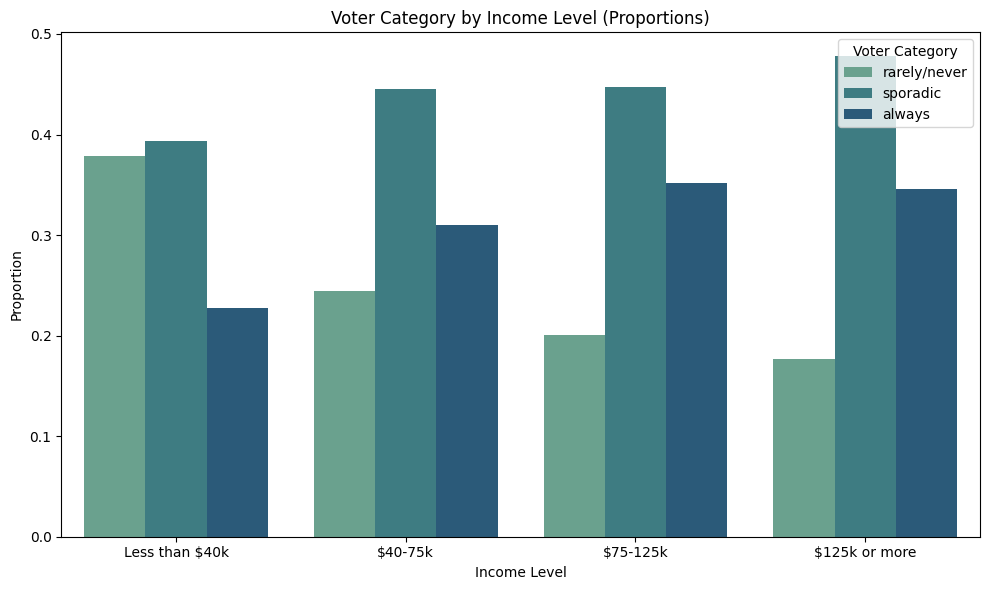

In [ ]:
# Plot Proportions for Voter Category by Income Level
income_order = ["Less than $40k", "$40-75k", "$75-125k", "$125k or more"]
voter_order = ["rarely/never", "sporadic", "always"]
plot_proportions(df_copy, 'income_cat', 'voter_category',
                 'Voter Category by Income Level (Proportions)',
                 'Income Level', 'Proportion', 'Voter Category', "crest", income_order, voter_order)

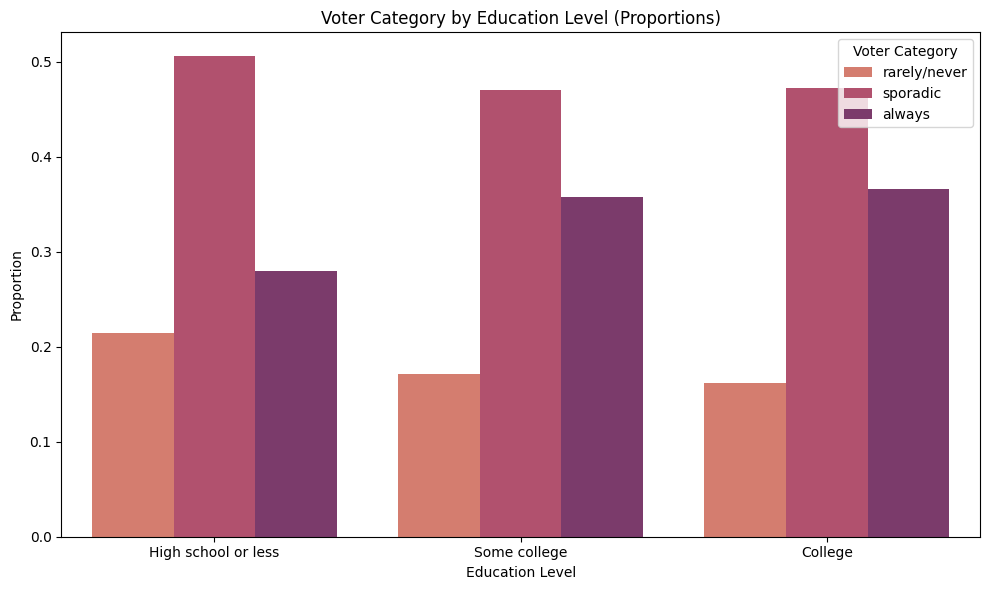

In [ ]:
# Plot Proportions for Voter Category by Education Level
education_order = ["High school or less", "Some college", "College"]
plot_proportions(df_copy, 'educ', 'voter_category',
                 'Voter Category by Education Level (Proportions)',
                 'Education Level', 'Proportion', 'Voter Category', "flare", education_order, voter_order)

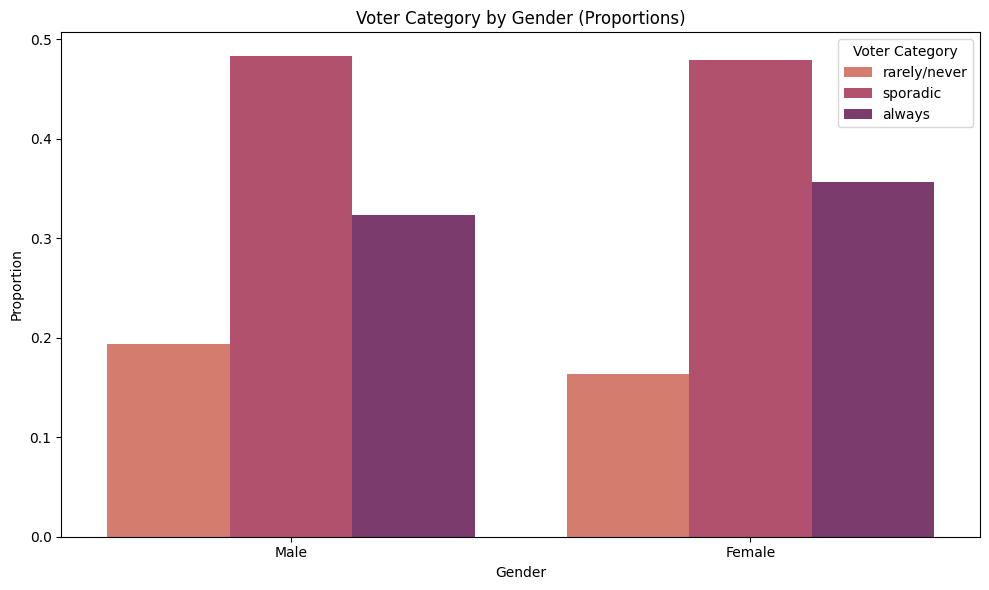

In [ ]:
# Plot Proportions for Voter Category by Gender
gender_order = ["Male", "Female"]
plot_proportions(df_copy, 'gender', 'voter_category',
                 'Voter Category by Gender (Proportions)',
                 'Gender', 'Proportion', 'Voter Category', "flare", gender_order, voter_order)

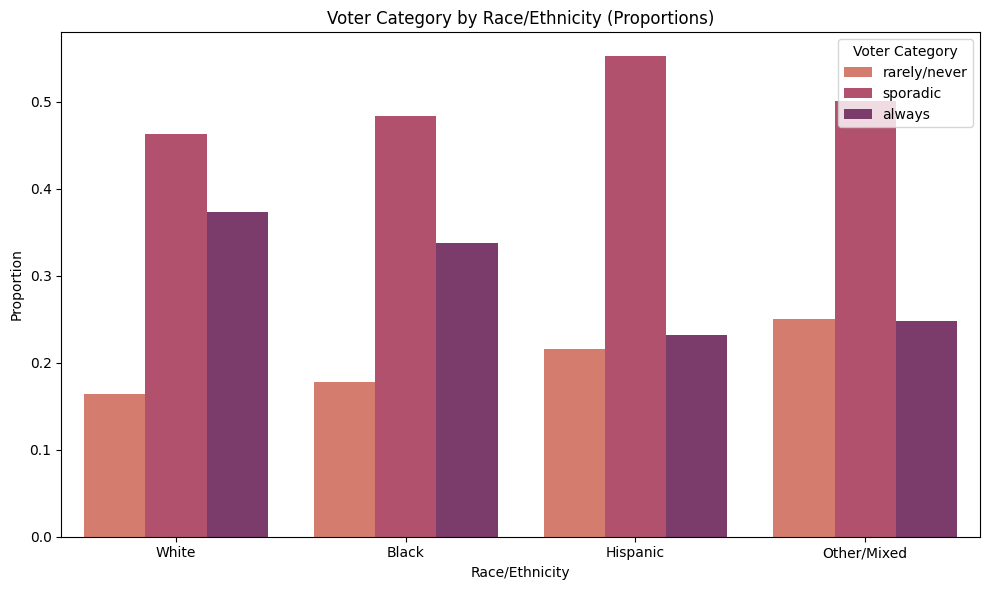

In [ ]:
# Plot Proportions for Voter Category by Race
race_order = ["White", "Black", "Hispanic", "Other/Mixed"]
plot_proportions(df_copy, 'race', 'voter_category',
                 'Voter Category by Race/Ethnicity (Proportions)',
                 'Race/Ethnicity', 'Proportion', 'Voter Category', "flare", race_order, voter_order)

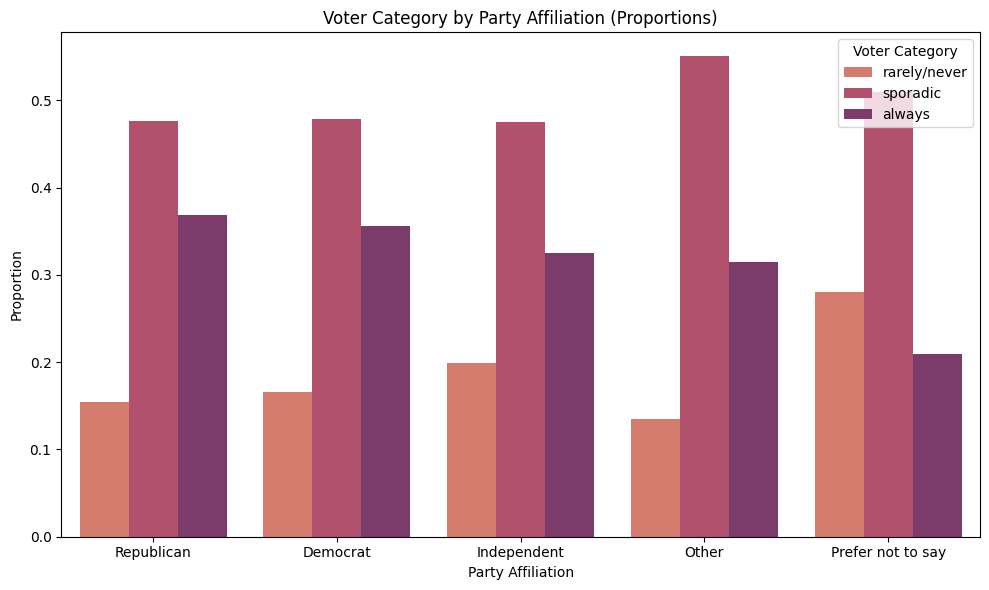

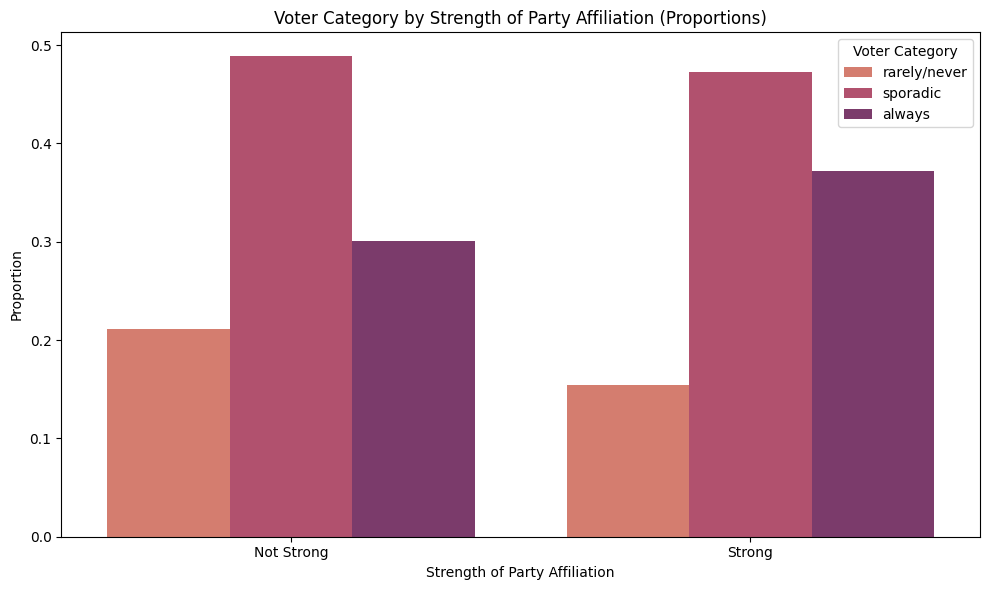

In [ ]:
# Plot Proportions for Voter Category by Party Affiliation
party_affiliation_labels = {
    1: 'Republican',
    2: 'Democrat',
    3: 'Independent',
    4: 'Other',
    5: 'Prefer not to say'
}
party_order = ["Republican", "Democrat", "Independent", "Other", "Prefer not to say"]
df_copy['party_affiliation_label'] = df_copy['Q30'].map(party_affiliation_labels)
df_copy = df_copy[df_copy['Q30'] != -1]
plot_proportions(df_copy, 'party_affiliation_label', 'voter_category',
                 'Voter Category by Party Affiliation (Proportions)',
                 'Party Affiliation', 'Proportion', 'Voter Category', "flare", party_order, voter_order)

# Plot Proportions for Voter Category by Party Strength
df_copy['party_strength'] = df_copy.apply(lambda row: (
    row['Q31'] if row['Q30'] == 1 else
    row['Q32'] if row['Q30'] == 2 else
    row['Q33'] if row['Q30'] in [3, 4, 5] else np.nan
), axis=1)
df_copy = df_copy[df_copy['party_strength'] != -1].dropna(subset=['party_strength'])
party_strength_labels = {
    1: 'Strong',
    2: 'Not Strong'
}
df_copy['party_strength'] = df_copy['party_strength'].map(party_strength_labels)
strength_order = ["Not Strong", "Strong"]
plot_proportions(df_copy, 'party_strength', 'voter_category',
                 'Voter Category by Strength of Party Affiliation (Proportions)',
                 'Strength of Party Affiliation', 'Proportion', 'Voter Category', "flare", strength_order, voter_order)

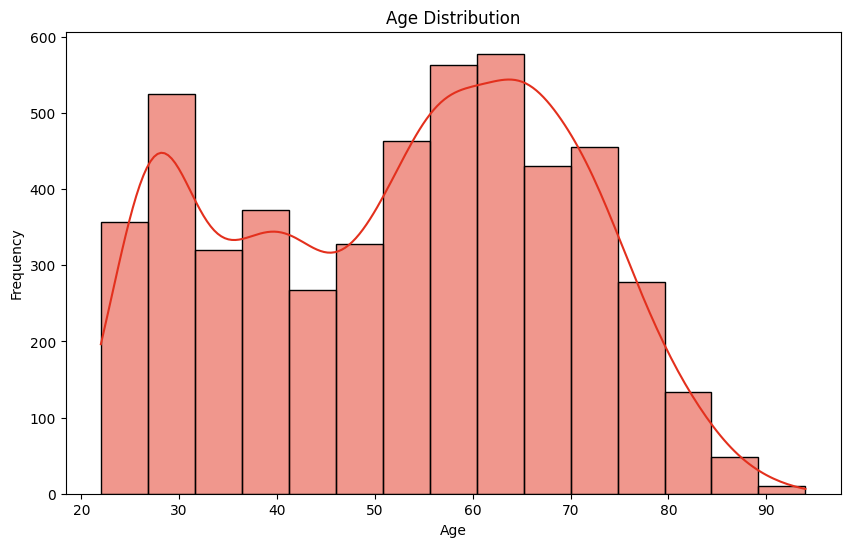

<ipython-input-198-69339c8bf3ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_copy.groupby([group_var, hue_var]).size().reset_index(name="count")
<ipython-input-198-69339c8bf3ad>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = counts.groupby(group_var)["count"].transform("sum")


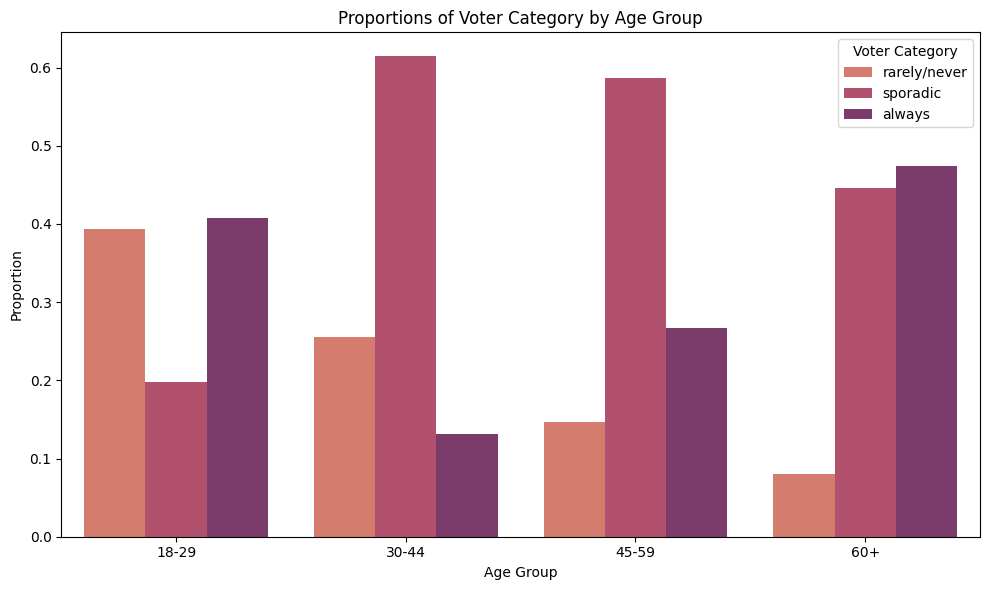

In [ ]:
# Plot Age Distribution of Sample
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['ppage'], kde=True, bins=15, color="#e3301d")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Plot Proportions for Voter Category by Age Group
bins = [18, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']
df_copy['age_group'] = pd.cut(df['ppage'], bins=bins, labels=labels, right=False)
plot_proportions(df_copy, 'age_group', 'voter_category',
                 'Proportions of Voter Category by Age Group',
                 'Age Group', 'Proportion', 'Voter Category', "flare", None, voter_order)

In [ ]:
df['binary_target'] = df_target['voter_category'].apply(lambda x: 1 if x == 2 else 0)
df['multiclass_target'] = df_target['voter_category']

target_bin = ['binary_target']
target_multi = ['multiclass_target']

y_binary = df['binary_target'].values.ravel()
y_multiclass = df['multiclass_target'].values.ravel()
X = df.drop(columns=['binary_target', 'multiclass_target'])

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=0)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multiclass, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_bin_scaled = scaler.fit_transform(X_train_bin)
X_test_bin_scaled = scaler.transform(X_test_bin)
X_train_multi_scaled = scaler.fit_transform(X_train_multi)
X_test_multi_scaled = scaler.transform(X_test_multi)

print("Binary Classification train size:", len(y_train_bin))
print("Multiclass Classification train size:", len(y_train_multi))

Binary Classification train size: 4608
Multiclass Classification train size: 4608


In [ ]:
y_train_bin_series = pd.Series(y_train_bin)
print(y_train_bin_series.value_counts())

0    3181
1    1427
Name: count, dtype: int64


In [ ]:
# Logistic Regression (Binary Classification)
model = LogisticRegression()
model.fit(X_train_bin_scaled, y_train_bin)
y_pred = model.predict(X_test_bin_scaled)
accuracy = accuracy_score(y_test_bin, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred).ravel()
print(f' TP: {tp}   FP: {fp}\n FN: {fn}   TN: {tn}')

# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

# Model Weights
lr_coef = pd.DataFrame({"weight": model.coef_[0]})
lr_coef["coef"] = X.columns
lr_coef = lr_coef[["coef", "weight"]]
lr_coef.sort_values(by="weight", ascending=False)

Accuracy: 0.6782307025151778
 TP: 0   FP: 0
 FN: 371   TN: 782
Precision: nan
Recall: 0.00000
f1: nan



<ipython-input-20-5fb420e67471>:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


,coef,weight
7,educ_High school or less,0.055493
1,participates_in_cong,0.055038
20,voter_category_rarely/never,0.041489
11,race_Other/Mixed,0.037388
15,income_cat_$125k or more,0.034963
19,voter_category_always,0.030175
3,Q5_2,0.027086
4,Q7_1,0.027017
17,income_cat_$75-125k,0.022765
0,participates_in_pres,0.020899


In [ ]:
# SVM Model (Binary Classification)
svc_model = SVC(kernel='poly', degree=4)
svc_model.fit(X_train_bin_scaled, y_train_bin)
y_pred = svc_model.predict(X_test_bin_scaled)
accuracy = accuracy_score(y_test_bin, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred).ravel()
print(f' TP: {tp}   FP: {fp}\n FN: {fn}   TN: {tn}')

# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

# Model Weights
svc_coef = pd.DataFrame({"weight": model.coef_[0]})
svc_coef["coef"] = X.columns
svc_coef = svc_coef[["coef", "weight"]]
svc_coef.sort_values(by="weight", ascending=False)

Accuracy: 0.6591500433651344
 TP: 14   FP: 36
 FN: 357   TN: 746
Precision: 0.28000
Recall: 0.03774
f1: 0.06651



,coef,weight
7,educ_High school or less,0.055493
1,participates_in_cong,0.055038
20,voter_category_rarely/never,0.041489
11,race_Other/Mixed,0.037388
15,income_cat_$125k or more,0.034963
19,voter_category_always,0.030175
3,Q5_2,0.027086
4,Q7_1,0.027017
17,income_cat_$75-125k,0.022765
0,participates_in_pres,0.020899


Accuracy: 0.6782307025151778
 TP: 0   FP: 0
 FN: 371   TN: 782
Precision: nan
Recall: 0.00000
f1: nan



<ipython-input-22-be61ec156586>:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


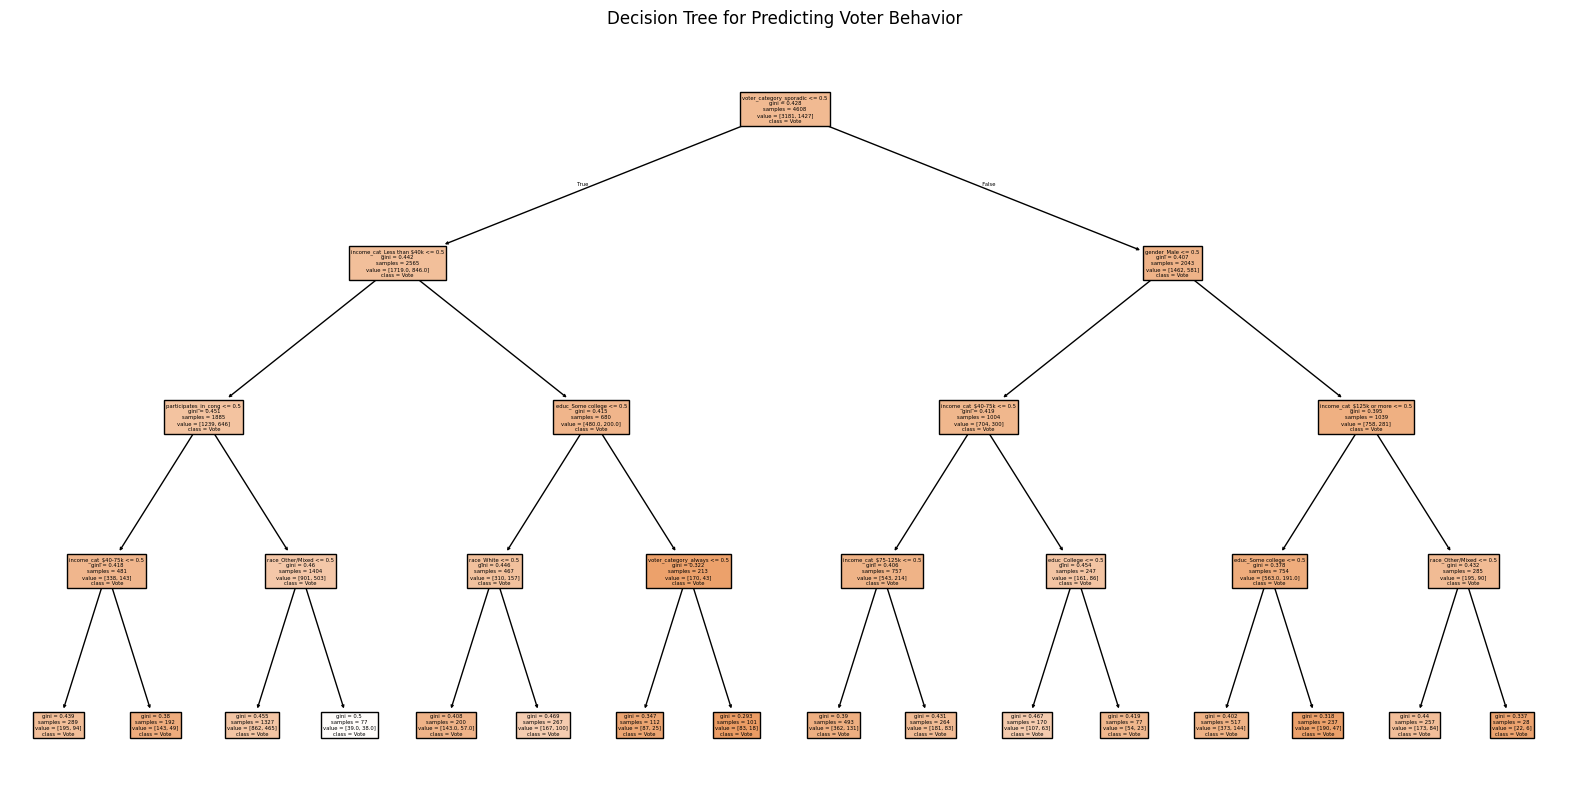

In [ ]:
# Decision Tree Model (Binary Classification)
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train_bin, y_train_bin)
y_pred = dt_model.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred).ravel()
print(f' TP: {tp}   FP: {fp}\n FN: {fn}   TN: {tn}')

# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

# Model Weights
svc_coef = pd.DataFrame({"weight": model.coef_[0]})
svc_coef["coef"] = X.columns
svc_coef = svc_coef[["coef", "weight"]]
svc_coef.sort_values(by="weight", ascending=False)

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Vote', 'No vote'])
plt.title("Decision Tree for Predicting Voter Behavior")
plt.show()

In [ ]:
# Random Forest Model (Binary Classification)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8)
rf_model.fit(X_train_bin, y_train_bin)
y_pred = rf_model.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test_bin, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')

# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.6712328767123288
 TP: 14    FP: 14
 FN: 370    TN: 770
Precision: 0.50000
Recall: 0.03646
f1: 0.06796



In [ ]:
# Neural Network (Binary Classification)
X_train_bin = X_train_bin.astype("float32")
X_test_bin = X_test_bin.astype("float32")
y_train_bin = y_train_bin.astype("float32")
y_test_bin = y_test_bin.astype("float32")

print(f"Test:  X: {X_test_bin.shape}     |    y: {y_test_bin.shape}")
print(f"Train: X: {X_train_bin.shape}     |    y: {y_train_bin.shape}")

print(np.max(X_train_bin), np.max(X_test_bin))

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_bin.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(X_train_bin, y_train_bin, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_bin, y_test_bin)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(X_test_bin[:20])
for i in range(20):
    print(f"Predicted: {int(predictions[i] > 0.5)}, Actual: {y_test_bin[i]}")


Test:  X: (1168, 8)     |    y: (1168,)
Train: X: (4668, 8)     |    y: (4668,)
3.0 3.0
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - binary_accuracy: 0.6723 - loss: 0.6373 - val_binary_accuracy: 0.7066 - val_loss: 0.5877
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.7012 - loss: 0.5954 - val_binary_accuracy: 0.7066 - val_loss: 0.5789
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.6877 - loss: 0.5943 - val_binary_accuracy: 0.7066 - val_loss: 0.5768
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.7033 - loss: 0.5892 - val_binary_accuracy: 0.7088 - val_loss: 0.5789
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.6982 - loss: 0.5869 - val_binary_accuracy: 0.7045 - val_loss: 0.5822
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6828 - loss: 0.5932 - val_binary_accuracy: 0.7056 - val_loss: 0.5764
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6961 - loss: 0.5908 - val_binary_accuracy: 0.7056 - val_loss: 0.5751
Epoch 8/10
117/

<ipython-input-233-535e1ebd171f>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted: {int(predictions[i] > 0.5)}, Actual: {y_test_bin[i]}")


In [ ]:
# SVM Model (Multiclass Classification)
svc_model = SVC(kernel='poly', degree=4)
svc_model.fit(X_train_multi_scaled, y_train_multi)
y_pred = svc_model.predict(X_test_multi_scaled)
accuracy = accuracy_score(y_test_multi, y_pred)
print(f'Accuracy: {accuracy}')


# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.4315068493150685
Precision: 0.50000
Recall: 0.03646
f1: 0.06796



Accuracy: 0.4357876712328767
Precision: 0.50000
Recall: 0.03646
f1: 0.06796



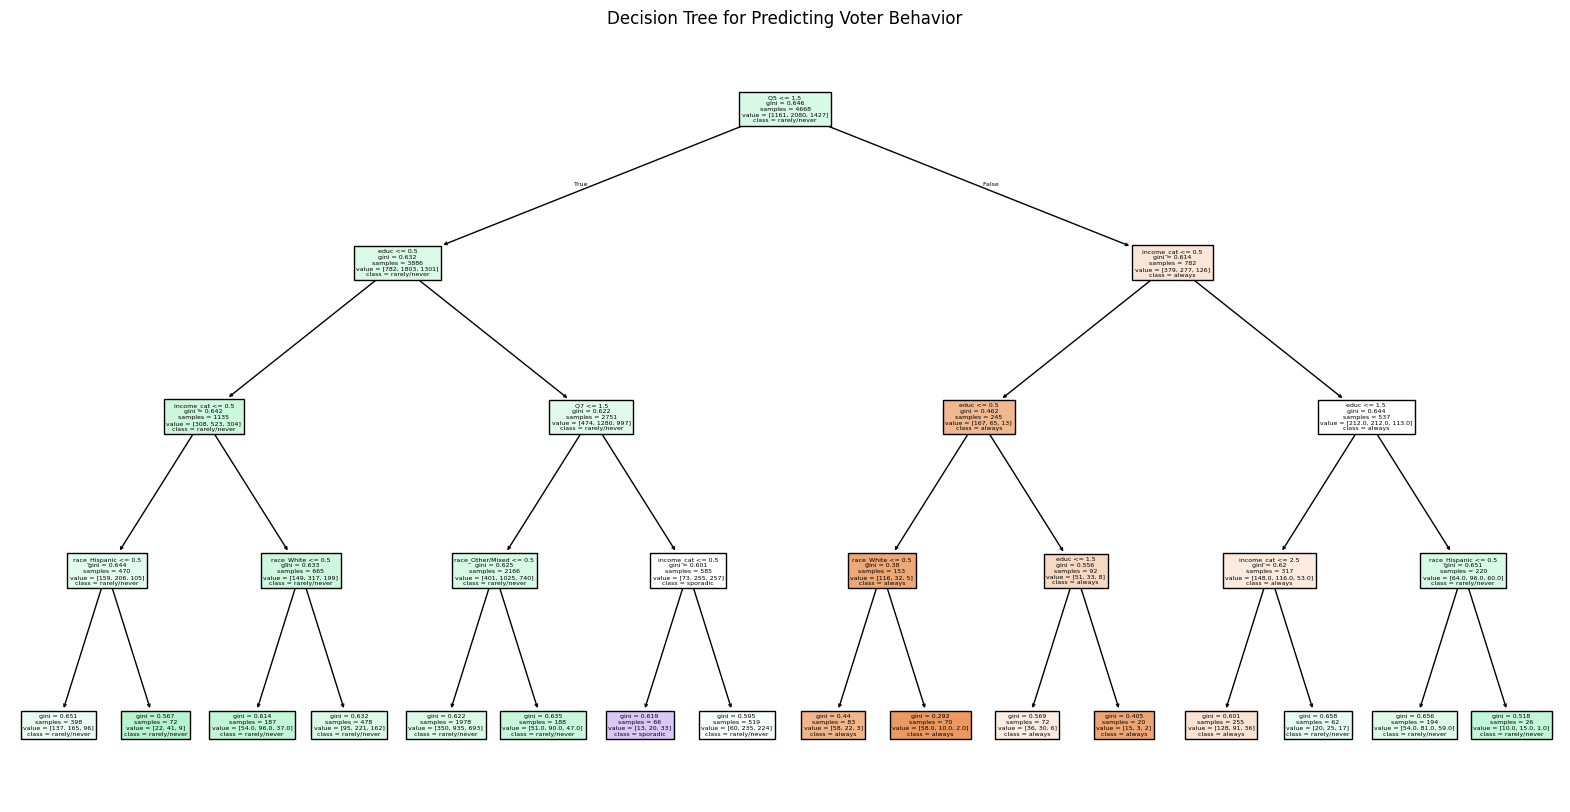

In [ ]:
# Decision Tree Model (Multiclass Classification)
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train_multi, y_train_multi)
y_pred = dt_model.predict(X_test_multi)
accuracy = accuracy_score(y_test_multi, y_pred)
print(f'Accuracy: {accuracy}')

# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

# Decision Tree Visualization
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['always', 'rarely/never', 'sporadic'])
plt.title("Decision Tree for Predicting Voter Behavior")
plt.show()

In [ ]:
# Random Forest Model (Multiclass Classification)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8)
rf_model.fit(X_train_multi, y_train_multi)
y_pred = rf_model.predict(X_test_multi)
accuracy = accuracy_score(y_test_multi, y_pred)
print(f'Accuracy: {accuracy}')

# Precision, Recall, and F1 Scores
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')

Accuracy: 0.4392123287671233
Precision: 0.50000
Recall: 0.03646
f1: 0.06796



In [ ]:
# Neural Network (Multiclass Classification)
print(f"Test:  X: {X_test_multi.shape}     |    y: {y_test_multi.shape}")
print(f"Train: X: {X_train_multi.shape}     |    y: {y_train_multi.shape}")

print(np.max(X_train_multi), np.max(X_test_multi))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train_multi_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_multi_scaled, y_train_multi, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test_multi_scaled, y_test_multi)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(X_test_multi_scaled[:20])
for i in range(20):
    print(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test_multi[i]}")

Test:  X: (1168, 8)     |    y: (1168,)
Train: X: (4668, 8)     |    y: (4668,)
3 3
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4097 - loss: 1.0742 - val_accuracy: 0.4850 - val_loss: 1.0040
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4707 - loss: 1.0043 - val_accuracy: 0.4839 - val_loss: 1.0025
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4794 - loss: 1.0163 - val_accuracy: 0.4529 - val_loss: 1.0092
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4795 - loss: 1.0052 - val_accuracy: 0.4893 - val_loss: 1.0027
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4769 - loss: 1.0105 - val_accuracy: 0.4722 - val_loss: 1.0013
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4682 - loss: 1.0189 - val_accuracy: 0.4775 - val_loss: 1.0099
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 1.0063 - val_accuracy: 0.4615 - val_loss: 1.0075
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 1.0007 - val_accuracy: 0.4507 - val_

In [ ]:
# PART 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
data = pd.read_csv('nonvoters_data.csv')

In [ ]:
# only want to focus on yes and no answers to whether or not they are planning on voting
#data = data[(data.Q21 != -1) & (data.Q21 != 3)]

# filter out the NA responses to whether or not participant feels that voting matters
data = data[(data['Q5'] != -1)]

# rename Q21 columns so it is more recognizable
data = data.rename(columns={'Q21':'will_vote'})

# filter out NA responses to Q7 and rename
data = data[(data['Q7'] != -1)]
data = data.rename(columns={'Q5':'voting_matters', 'Q7': 'changes_needed'})

In [ ]:
# Use get_dummies to create separate columns for each response to each question
new_data = pd.get_dummies(data, columns=['changes_needed', 'educ', 'race', 'gender', 'income_cat', 'voting_matters', 'voter_category'])
new_data['voter_category_not_always'] = (new_data['voter_category_rarely/never'] == True) | (new_data['voter_category_sporadic'] == True)
new_data.head(15)

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,income_cat_$125k or more,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voting_matters_1,voting_matters_2,voter_category_always,voter_category_rarely/never,voter_category_sporadic,voter_category_not_always
0,470001,0.7516,1,1,1,2,4,1,4,2,...,False,False,True,False,True,False,True,False,False,False
1,470002,1.0267,1,1,2,2,3,1,1,2,...,True,False,False,False,True,False,True,False,False,False
2,470003,1.0844,1,1,1,2,2,1,1,2,...,True,False,False,False,True,False,False,False,True,True
3,470007,0.6817,1,1,1,1,3,1,1,1,...,False,True,False,False,True,False,False,False,True,True
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,False,True,False,False,True,False,True,False,False,False
5,480009,1.0591,1,3,2,3,4,1,3,3,...,False,True,False,False,False,True,False,True,False,True
6,480010,1.1512,1,1,1,2,3,1,1,1,...,True,False,False,False,True,False,True,False,False,False
7,470008,1.0174,1,1,1,2,2,1,3,1,...,False,False,True,False,True,False,True,False,False,False
8,470010,0.8184,1,1,1,1,3,1,1,1,...,True,False,False,False,True,False,True,False,False,False
9,470011,1.1653,1,1,1,2,1,1,1,1,...,True,False,False,False,True,False,True,False,False,False


In [ ]:
# prepare heatmap
for column in ['changes_needed_1', 'changes_needed_2', 'voting_matters_1', 'voting_matters_1',
               'voting_matters_2', 'educ_College', 'educ_High school or less', 'educ_Some college',
               'race_Black', 'race_Hispanic', 'race_Other/Mixed', 'race_White', 'gender_Female', 'gender_Male',
               'income_cat_$125k or more', 'income_cat_$40-75k', 'income_cat_$75-125k', 'income_cat_Less than $40k',
               'voter_category_always', 'voter_category_rarely/never', 'voter_category_sporadic', 'voter_category_not_always']:
    le = LabelEncoder()  # Create a new LabelEncoder for each column
    new_data[column] = le.fit_transform(new_data[column]) # Fit and transform the current column
new_data.iloc[:, -50:].head(20)

,Q27_1,Q27_2,Q27_3,Q27_4,Q27_5,Q27_6,Q28_1,Q28_2,Q28_3,Q28_4,...,income_cat_$125k or more,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voting_matters_1,voting_matters_2,voter_category_always,voter_category_rarely/never,voter_category_sporadic,voter_category_not_always
0,1,1,1,1,1,1,1.0,1.0,1.0,1.0,...,0,0,1,0,1,0,1,0,0,0
1,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,...,1,0,0,0,1,0,1,0,0,0
2,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,...,1,0,0,0,1,0,0,0,1,1
3,1,1,1,1,1,1,1.0,1.0,-1.0,1.0,...,0,1,0,0,1,0,0,0,1,1
4,1,1,1,1,1,1,1.0,1.0,1.0,-1.0,...,0,1,0,0,1,0,1,0,0,0
5,2,2,2,2,2,2,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,0,1,0,1
6,1,1,1,1,1,1,1.0,-1.0,1.0,1.0,...,1,0,0,0,1,0,1,0,0,0
7,1,1,1,1,1,1,1.0,-1.0,-1.0,-1.0,...,0,0,1,0,1,0,1,0,0,0
8,1,1,1,1,1,1,1.0,-1.0,1.0,-1.0,...,1,0,0,0,1,0,1,0,0,0
9,1,1,1,1,1,1,1.0,1.0,-1.0,-1.0,...,1,0,0,0,1,0,1,0,0,0


<Axes: >

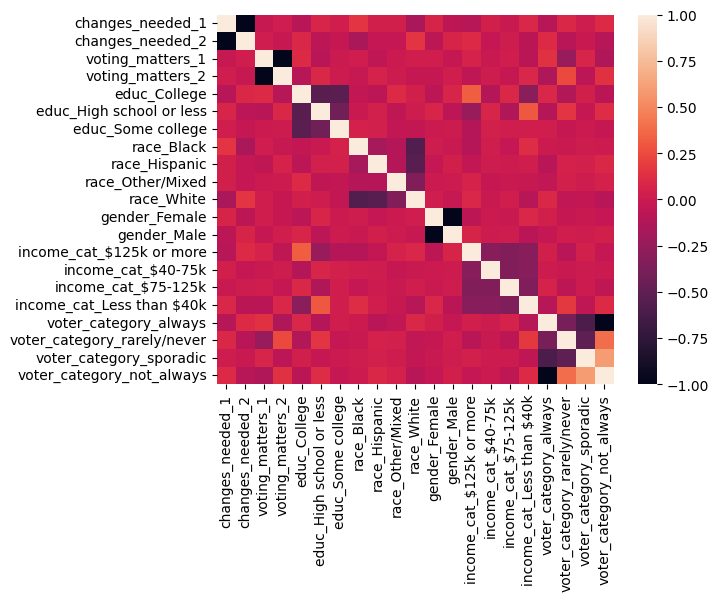

In [ ]:
# make heatmap
heatmap_data = new_data[['changes_needed_1', 'changes_needed_2', 'voting_matters_1',
               'voting_matters_2', 'educ_College', 'educ_High school or less', 'educ_Some college',
               'race_Black', 'race_Hispanic', 'race_Other/Mixed', 'race_White', 'gender_Female', 'gender_Male',
               'income_cat_$125k or more', 'income_cat_$40-75k', 'income_cat_$75-125k', 'income_cat_Less than $40k',
               'voter_category_always', 'voter_category_rarely/never', 'voter_category_sporadic', 'voter_category_not_always']]
sns.heatmap(heatmap_data.corr())

In [ ]:
final_data = heatmap_data

In [ ]:
final_data['participates_in_pres'] = (new_data['Q27_2'] == 1) | (new_data['Q27_4'] == 1) | (new_data['Q27_6'] == 1)
final_data['participates_in_cong'] = (new_data['Q27_1'] == 1) | (new_data['Q27_3'] == 1) | (new_data['Q27_5'] == 1)
for column in ['participates_in_pres', 'participates_in_cong']:
    le = LabelEncoder()  # Create a new LabelEncoder for each column
    final_data[column] = le.fit_transform(final_data[column]) # Fit and transform the current column

<ipython-input-287-c95fa3310a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['participates_in_pres'] = (new_data['Q27_2'] == 1) | (new_data['Q27_4'] == 1) | (new_data['Q27_6'] == 1)
<ipython-input-287-c95fa3310a4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['participates_in_cong'] = (new_data['Q27_1'] == 1) | (new_data['Q27_3'] == 1) | (new_data['Q27_5'] == 1)
<ipython-input-287-c95fa3310a4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
final_data.columns

Index(['changes_needed_1', 'changes_needed_2', 'voting_matters_1',
       'voting_matters_2', 'educ_College', 'educ_High school or less',
       'educ_Some college', 'race_Black', 'race_Hispanic', 'race_Other/Mixed',
       'race_White', 'gender_Female', 'gender_Male',
       'income_cat_$125k or more', 'income_cat_$40-75k', 'income_cat_$75-125k',
       'income_cat_Less than $40k', 'voter_category_always',
       'voter_category_rarely/never', 'voter_category_sporadic',
       'voter_category_not_always', 'participates_in_pres',
       'participates_in_cong'],
      dtype='object')

In [ ]:
correlation_data = final_data.corr(method='pearson')
correlation_data['voter_category_rarely/never'].sort_values(ascending=False).head(40)

,voter_category_rarely/never
voter_category_rarely/never,1.000000
voter_category_not_always,0.384845
voting_matters_2,0.239508
income_cat_Less than $40k,0.170306
educ_High school or less,0.155138
changes_needed_1,0.086832
race_Hispanic,0.048094
race_Other/Mixed,0.042573
gender_Male,0.023915
income_cat_$40-75k,-0.008171


In [ ]:
final_data.isna().sum()

,0
changes_needed_1,0
changes_needed_2,0
voting_matters_1,0
voting_matters_2,0
educ_College,0
educ_High school or less,0
educ_Some college,0
race_Black,0
race_Hispanic,0
race_Other/Mixed,0


<Axes: >

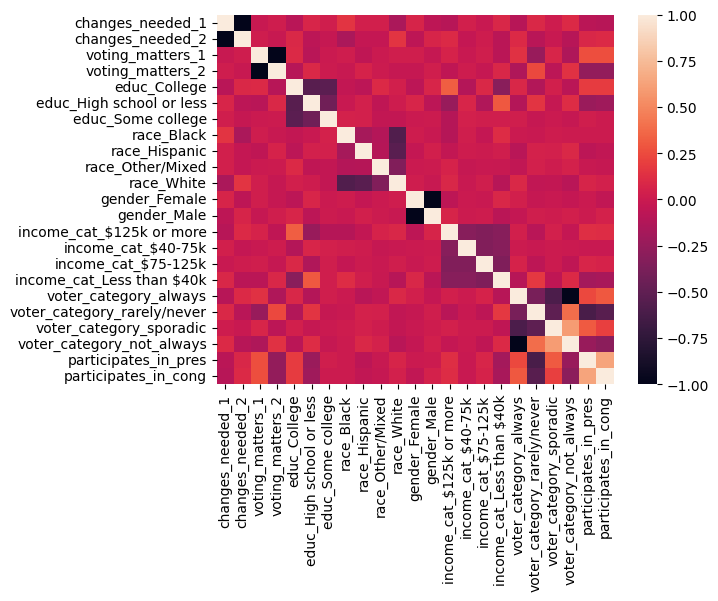

In [ ]:
sns.heatmap(final_data.corr())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print(final_data.shape)
target = ['voter_category_rarely/never']
X = final_data.drop(target+['voter_category_always', 'voter_category_sporadic', 'voter_category_not_always'], axis=1)
y = final_data[target].values.ravel()
print(f"X: {X.shape}   |    y: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(5761, 23)
X: (5761, 19)   |    y: (5761,)


Accuracy: 0.8620988725065047
 TP: 157    FP: 28
 FN: 131    TN: 837
Precision: 0.84865
Recall: 0.54514
f1: 0.66385



<ipython-input-294-2722c3532680>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='coef', data=lr_coef.head(6), palette='crest')


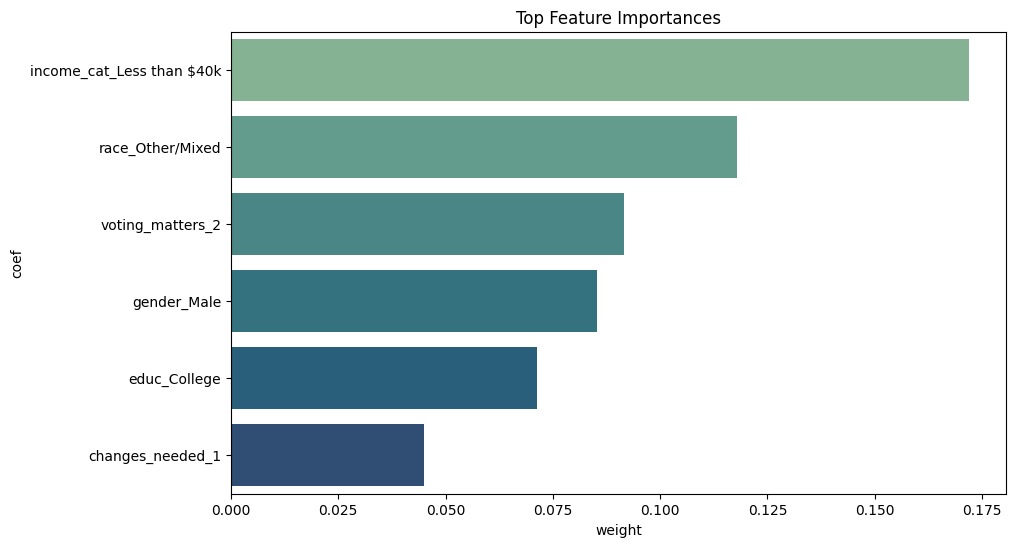

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')
lr_coef = pd.DataFrame({"weight": model.coef_[0]})
lr_coef["coef"] = X.columns
lr_coef = lr_coef[["coef", "weight"]]
lr_coef = lr_coef.sort_values(by="weight", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='weight', y='coef', data=lr_coef.head(6), palette='crest')
plt.title('Top Feature Importances')
plt.show()

Accuracy: 0.852558542931483
 TP: 152    FP: 34
 FN: 136    TN: 831
Precision: 0.81720
Recall: 0.52778
f1: 0.64135



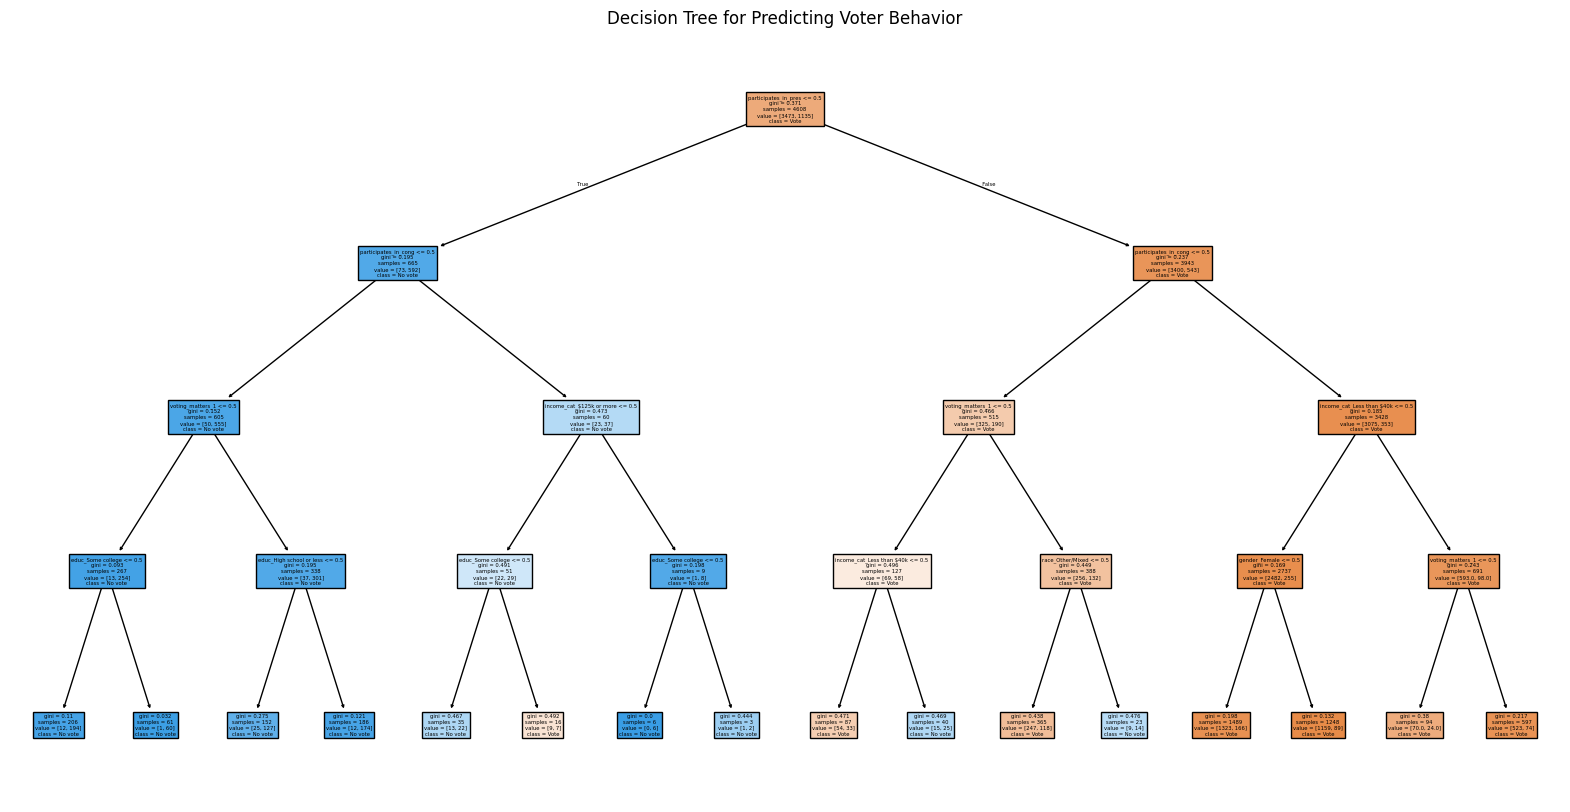

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Vote', 'No vote'])
plt.title("Decision Tree for Predicting Voter Behavior")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Precision: {precision:.5f}\nRecall: {recall:.5f}\nf1: {f1_score:.5f}\n')


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(f"Test:  X: {X_test.shape}     |    y: {y_test.shape}")
print(f"Train: X: {X_train.shape}     |    y: {y_train.shape}")
print(np.max(X_train), np.max(X_test))
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(256, activation='relu'),   # 256 hidden nodes and 'relu' activation
  tf.keras.layers.Dense(10)                        # output_layer needs 10 nodes
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
predictions = model.predict(X_test[:20])
for i in range(20):
  print(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")

Test:  X: (1153, 19)     |    y: (1153,)
Train: X: (4608, 19)     |    y: (4608,)
1 1
Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.7026 - loss: 1.0485 - val_categorical_accuracy: 0.8644 - val_loss: 0.3677
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8641 - loss: 0.3658 - val_categorical_accuracy: 0.8720 - val_loss: 0.3481
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8538 - loss: 0.3804 - val_categorical_accuracy: 0.8764 - val_loss: 0.3474
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8591 - loss: 0.3701 - val_categorical_accuracy: 0.8764 - val_loss: 0.3424
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8712 - loss: 0.3572 - val_categorical_accuracy: 0.8753 - val_loss: 0.3447
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.8595 - loss: 0.3636 - val_categorical_accuracy: 0.8807 - val_loss: 0.3433
Ep